In [3]:
import sys
import os
from matplotlib import pyplot as plt
from dotenv import load_dotenv
load_dotenv()

sys.path.append(os.path.dirname(os.getcwd()))

from utils import *



In [6]:
yt_data = authenticate_data(os.environ["GOOGLE_SECRETS_PATH"])
yt_analytics = authenticate_analytics(os.environ["GOOGLE_SECRETS_PATH"])

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=612210255116-kshkddrfv6t6m4ucjbgskttsshud8q78.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A64678%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube.readonly+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyt-analytics.readonly+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube.force-ssl+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutubepartner+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyt-analytics-monetary.readonly&state=QALWNtcTpDnueEsa0Ds6lBnb2F5djW&access_type=offline
Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=612210255116-kshkddrfv6t6m4ucjbgskttsshud8q78.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A64686%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube.readonly+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyt-analytics.readonly+https%3

In [7]:
# getting the list of BBC channels

channels = get_channels_list(yt_data)


In [8]:
channels.head()

,kind,etag,id,contentDetails.relatedPlaylists.likes,contentDetails.relatedPlaylists.uploads
0,youtube#channel,_BKtHFhSreX46bRbhXB15tSD9mo,UCY8q94xKQOnJ-Mtoh2ZtsIg,LL,UUY8q94xKQOnJ-Mtoh2ZtsIg
1,youtube#channel,bIQlPGfY_GzLU_Ldh76rikSZxkc,UCe63OVYiFzc3klMKS9JRq4A,LL,UUe63OVYiFzc3klMKS9JRq4A
2,youtube#channel,qKa5CEP4DzPnk9gcgQjaS43-THw,UCNzsH0gaZSRKCCg0N9-t_dA,LL,UUNzsH0gaZSRKCCg0N9-t_dA
3,youtube#channel,ERLBE_Td0H_SA_kIi-OkWlcuOWE,UC5GBYgwtE1N0DEjuQFtb28A,LL,UU5GBYgwtE1N0DEjuQFtb28A
4,youtube#channel,nEtJtv9F6N2Uby2CyNGzCTfsJvk,UCUCfrQJCw5GGg7mCp50V-ZQ,LL,UUUCfrQJCw5GGg7mCp50V-ZQ


In [251]:
# we choose a channel Top Gear
# channel = get_channel_metadata(yt_data, "UCjOl2AUblVmg2rA_cRgZkFg")
# we choose a channel Dr Who
channel = get_channel_metadata(yt_data, "UCcOkA2Xmk1valTOWSyKyp4g")
channel.head()

,kind,etag,id,snippet.title,snippet.description,snippet.customUrl,snippet.publishedAt,snippet.thumbnails.default.url,snippet.thumbnails.default.width,snippet.thumbnails.default.height,...,snippet.thumbnails.high.height,snippet.defaultLanguage,snippet.localized.title,snippet.localized.description,contentDetails.relatedPlaylists.likes,contentDetails.relatedPlaylists.uploads,statistics.viewCount,statistics.subscriberCount,statistics.hiddenSubscriberCount,statistics.videoCount
0,youtube#channel,vHK5Iz8IcUFcGzOUwH8LybzW-m0,UCcOkA2Xmk1valTOWSyKyp4g,Doctor Who,Welcome to the official home of Doctor Who on ...,@doctorwho,2005-12-15T18:53:27Z,https://yt3.ggpht.com/vjYIgjn-2RABqfy8tWY6RG36...,88,88,...,800,en-GB,Doctor Who,Welcome to the official home of Doctor Who on ...,LL,UUcOkA2Xmk1valTOWSyKyp4g,898915365,1890000,False,2640


In [253]:
# getting the list of videos from a channel
videos = get_video_list(yt_data, max_results=100, channel_id=channel["id"].iloc[0])
videos.head(20)

,kind,etag,id.kind,id.videoId
0,youtube#searchResult,ThJTtQ8lz954bDQLHV9xO5j_kKA,youtube#video,LouEkgWq3Fo
1,youtube#searchResult,UgoL_rF3lbM3S-09ntueQA24bXc,youtube#video,jGb9Iu5wX7U
2,youtube#searchResult,rZdRf83wGTYw99seUxfOCMiWWDs,youtube#video,xKynt-aoAIM
3,youtube#searchResult,SJr4jDvgWpKtkuQjH7Qq_keomGE,youtube#video,X_1bgdz7vig
4,youtube#searchResult,AHGt19F6z61p8hOSvs8ObhdN-Bc,youtube#video,L-thOgnle4A
5,youtube#searchResult,Y6Q6T9BNj1HNQjt1fIRpMJ0bcIw,youtube#video,xrE5bta6ORU
6,youtube#searchResult,bVAjcqwq3EdapPYPGeZjNj6c-p0,youtube#video,NzmUHmXv4xQ
7,youtube#searchResult,K2aMLW2ZdSfCXXVbbAyd4VihWCE,youtube#video,9Q8qvD7PH40
8,youtube#searchResult,x7mhYtALb_AqUD7eE__F5ra26lA,youtube#video,Woe4O-Jv8r4
9,youtube#searchResult,jtKogbPfE6CvvehbtjHXkkH_en4,youtube#video,vOmaynxi018


In [254]:
# video data: Getting video metadata
v_metadata = get_video_metadata(yt_data, ["xrE5bta6ORU"])
v_metadata.head()

,kind,etag,id,snippet.publishedAt,snippet.channelId,snippet.title,snippet.description,snippet.thumbnails.default.url,snippet.thumbnails.default.width,snippet.thumbnails.default.height,...,snippet.thumbnails.standard.width,snippet.thumbnails.standard.height,snippet.thumbnails.maxres.url,snippet.thumbnails.maxres.width,snippet.thumbnails.maxres.height,snippet.channelTitle,snippet.categoryId,snippet.liveBroadcastContent,snippet.localized.title,snippet.localized.description
0,youtube#video,xPyQjTxW9BdeRVP8XkM9kQKupGI,xrE5bta6ORU,2023-12-04T19:00:25Z,UCcOkA2Xmk1valTOWSyKyp4g,Relive the moment the Doctor and Donna realise...,"""My arms are too long..."" 😱\n\nRelive the mome...",https://i.ytimg.com/vi/xrE5bta6ORU/default.jpg,120,90,...,640,480,https://i.ytimg.com/vi/xrE5bta6ORU/maxresdefau...,1280,720,Doctor Who,24,none,Relive the moment the Doctor and Donna realise...,"""My arms are too long..."" 😱\n\nRelive the mome..."


In [255]:
# Getting video analytics
v_analytics = get_video_analytics(
    yt_analytics=yt_analytics,
    start_date="2023-01-01",
    end_date="2024-01-01",
    video_ids=["xrE5bta6ORU"],
)

v_analytics.head()

,day,views,likes,dislikes,comments,estimatedMinutesWatched,averageViewDuration,averageViewPercentage,cpm,estimatedAdRevenue,estimatedRevenue,estimatedRedPartnerRevenue,adImpressions,monetizedPlaybacks,playbackBasedCpm,video_id
0,2023-12-04,84063,6859,64,85,64669,46,88.76,0,0,0,0,0,0,0,xrE5bta6ORU
1,2023-12-08,80894,4130,57,23,61093,45,87.14,0,0,0,0,0,0,0,xrE5bta6ORU
2,2023-12-13,80496,4308,57,17,63065,47,90.40,0,0,0,0,0,0,0,xrE5bta6ORU
3,2023-12-07,77701,4735,52,29,59407,45,88.22,0,0,0,0,0,0,0,xrE5bta6ORU
4,2023-12-05,76927,5461,44,55,61211,47,91.81,0,0,0,0,0,0,0,xrE5bta6ORU


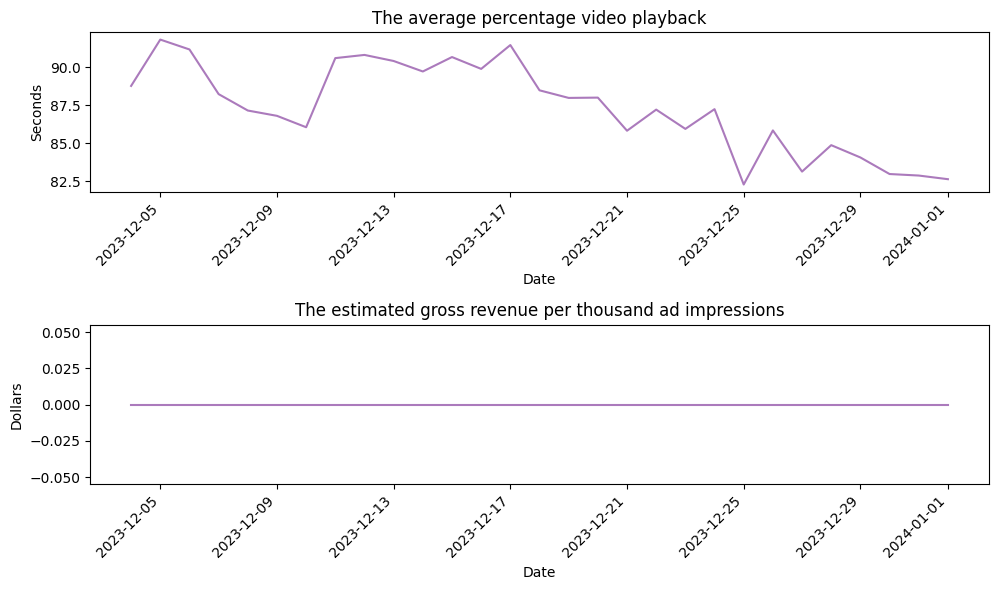

In [256]:
v_analytics["day"] = pd.to_datetime(v_analytics["day"])

v_analytics.sort_values(by="day", inplace=True)

fig, ax = plt.subplots(2, figsize=(10, 6))

temp = v_analytics.query("day >= '2023-11-01'")
ax[0].plot(temp["day"], temp["averageViewPercentage"], color="#AB7ABC")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Seconds")
ax[0].set_title("The average percentage video playback")
ax[0].set_xticks(ax[0].get_xticks(), ax[0].get_xticklabels(), rotation=45, ha="right")

ax[1].plot(temp["day"], temp["playbackBasedCpm"], color="#AB7ABC")
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Dollars")
ax[1].set_title("The estimated gross revenue per thousand ad impressions")
ax[1].set_xticks(ax[1].get_xticks(), ax[1].get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()

In [257]:
# Getting video retention
v_retention = get_audience_retention(
    yt_analytics=yt_analytics,
    start_date="2023-01-01",
    end_date="2024-01-01",
    video_ids=["xrE5bta6ORU"],
    metrics=["audienceWatchRatio"],
)

v_retention.head()

,elapsedVideoTimeRatio,audienceWatchRatio,video_id
0,0.01,1.6722,xrE5bta6ORU
1,0.02,1.5720,xrE5bta6ORU
2,0.03,1.3831,xrE5bta6ORU
3,0.04,1.3160,xrE5bta6ORU
4,0.05,1.2703,xrE5bta6ORU


Text(0.5, 1.0, 'Video retention')

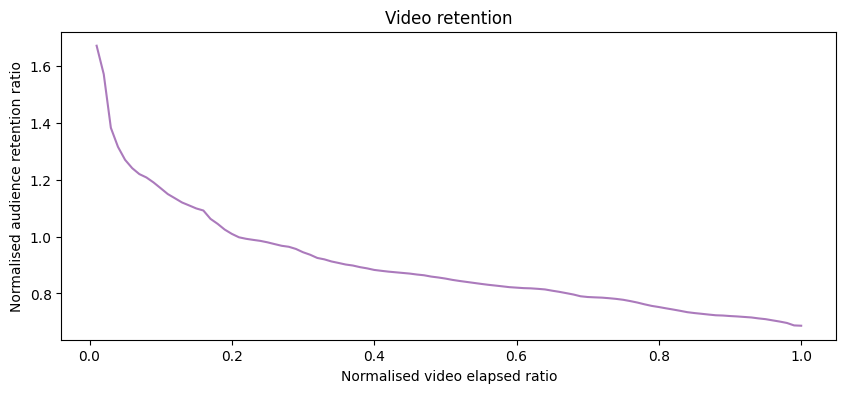

In [258]:
fig, ax = plt.subplots(figsize=(10, 4))

plt.plot(
    v_retention["elapsedVideoTimeRatio"],
    v_retention["audienceWatchRatio"],
    color="#AB7ABC",
)
plt.xlabel("Normalised video elapsed ratio")
plt.ylabel("Normalised audience retention ratio")
plt.title("Video retention")

In [259]:
v_comments = get_video_comments(
    video_id = "LouEkgWq3Fo", 
    yt_data = yt_data)
# v_comments.head(100)
#v_comments["snippet.topLevelComment.snippet.textOriginal"].to_csv('out.csv')

v_comments1 = get_video_comments(
    video_id = "jGb9Iu5wX7U", 
    yt_data = yt_data)

v_comments2 = get_video_comments(
    video_id = "xKynt-aoAIM", 
    yt_data = yt_data)

v_comments3 = get_video_comments(
    video_id = "X_1bgdz7vig", 
    yt_data = yt_data)

v_comments4 = get_video_comments(
    video_id = "L-thOgnle4A", 
    yt_data = yt_data)

newdf = pd.concat([v_comments, v_comments1, v_comments2, v_comments3, v_comments4], axis=0)
newdf = newdf.reset_index()
newdf["snippet.topLevelComment.snippet.textOriginal"].to_csv('outDrWho.csv')

Sentiment per line: [-1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  0.  1.  1. -1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1. -1.
  1.  1.  1.  1.  1. -1.  1.  1.  1. -1. -1.  0.  1. -1.  1.  1.  1. -1.
  1. -1. -1.  1.  1.  1.  1.  1. -1.  1.  1.  1. -1.  1.  0.  1.  1.  1.
  1.  1.  1.  0.  1.  1.  1.  1.  1. -1.  1. -1.  1.  1.  0.  1.  1.  1.
 -1. -1.  1. -1.  1.  1.  1.  1. -1. -1.]
There are 6 neutral comments for this video.
There are 74 positive comments for this video.
There are 20 negative comments for this video.


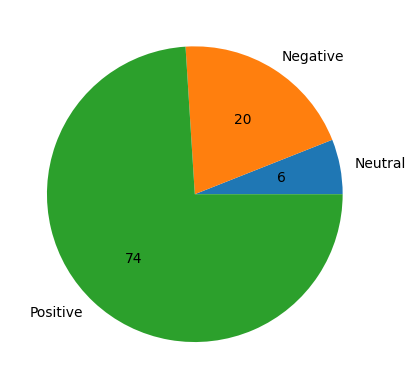

[-1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  0  1  0 -1 -1
  1  0  1 -1  0 -1  0  1 -1  1  1  0  0  0  1 -1  0 -1  1  0 -1 -1 -1  0
  1 -1 -1 -1  0 -1 -1  1  0  0  0  0  0  1 -1  1  1  1 -1  1  1  1  1  1
  1 -1  1  1  1  1  1  1  1 -1  1  0 -1  0  0 -1  1  1 -1  0  1 -1  1 -1
 -1  1 -1 -1]
[-1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  0.  1.  1. -1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1. -1.
  1.  1.  1.  1.  1. -1.  1.  1.  1. -1. -1.  0.  1. -1.  1.  1.  1. -1.
  1. -1. -1.  1.  1.  1.  1.  1. -1.  1.  1.  1. -1.  1.  0.  1.  1.  1.
  1.  1.  1.  0.  1.  1.  1.  1.  1. -1.  1. -1.  1.  1.  0.  1.  1.  1.
 -1. -1.  1. -1.  1.  1.  1.  1. -1. -1.]
The accuracy of this model is: 0.65


In [322]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from matplotlib.pyplot import pie, show
from numpy import array
from sklearn.metrics import precision_recall_curve, roc_curve

# Load the CSV file into a DataFrame
df = pd.read_csv('Twitter.csv')
df = df.dropna()
# Preprocess the text data using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Text'].values.astype('U'))

# Train a Naive Bayes classifier on the preprocessed data
clf = MultinomialNB()
clf.fit(X, df['Sentiment'])

# Make predictions on new text data
new_data = pd.read_csv('outDrWho.csv')
new_predictions = clf.predict(vectorizer.transform(new_data['snippet.topLevelComment.snippet.textOriginal']))
print('Sentiment per line:', new_predictions)
unique, counts = np.unique(new_predictions, return_counts=True)



# Separate into groups
neg = np.asarray((counts[0])).T
nut = np.asarray((counts[1])).T
pos = np.asarray((counts[2])).T
print('There are', nut, 'neutral comments for this video.')
print('There are', pos, 'positive comments for this video.')
print('There are', neg, 'negative comments for this video.')


labels1 = ["Neutral", "Negative", "Positive"]
pie([nut, neg, pos], labels = labels1, autopct='%.0f')
show() 

# Accuracy of model
y_true = new_data['Sentiment']
y_true1 = y_true.to_numpy()
print(y_true1)
print(new_predictions)
print('The accuracy of this model is:', accuracy_score(y_true, new_predictions))




In [328]:
new_predictions[54]

1.0